<a href="https://colab.research.google.com/github/EYOSIYAS7/Machine_Learning_Projects/blob/main/introduction_to_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
!pip install  tensorflow-datasets matplotlib ipywidgets

In [ ]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')

print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


In [ ]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

# Dowinloading the data by using tensorflow_dataset api

In [ ]:
ds =tfds.load("fashion_mnist", split="train")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteKK52C0/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteKK52C0/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


Visual data and build dataset

In [ ]:
import numpy as np

In [ ]:
#set up the connection aka numpy iterator
datasetIterator = ds.as_numpy_iterator()

In [ ]:
# fetch a batch of data
datasetIterator.next()['image'].shape

(28, 28, 1)

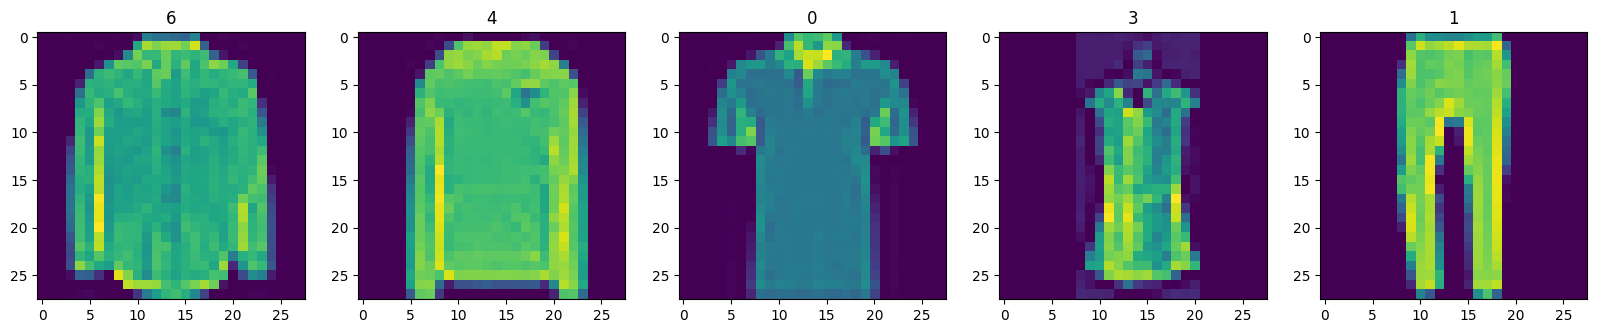

In [ ]:
# the axe is the individual sub images and fig is the whole image
fig, axe = plt.subplots( ncols=5, figsize=(20,20) )

for idx in range(5):
  sample = datasetIterator.next()
  axe[idx].imshow((sample['image']))
  axe[idx].title.set_text(sample["label"])

In [ ]:
def scale_image(data):
  image = data['image']
  return image/255

why do we do a mcsbp preprocessing??

In [ ]:
#mcsbp data pipeline
ds = tfds.load("fashion_mnist", split = "train")
ds = ds.map(scale_image)
# the use of cache in terms avoiding the need to re-read the data from disk in subsequent epochs
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
# it makes the idle cpu to prefetch the next batch of data while the GPU is processing the current batch data
ds = ds.prefetch(64)

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# Build the Neural Network